**Prática de Histogramas**

1) 
- Produza a imagem ‘negativa’ do arquivo ‘im_cells.png’
- Com a imagem negativa, produza a imagem original novamente. 
- Mostre lado a lado a imagem original e a negativa. Em qual deles os objetos presentes na imagem são melhor percebidos? Justifique.
- Aplique a imagem uma função logarítmica.


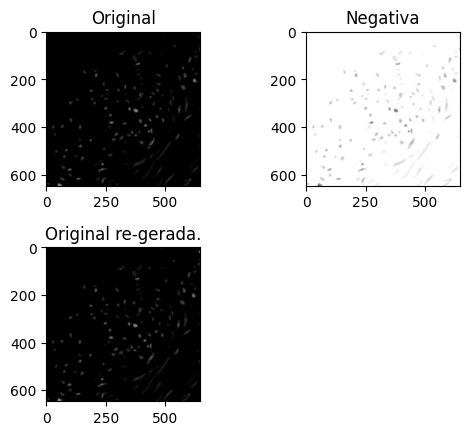

In [12]:
# Na imagem original é mais fácil perceber os objetos presentes. Isso ocorre pois há maior contraste entre os objetos e o fundo na imagem original do que na imagem negativa.


import cv2
import matplotlib.pyplot as plt
import math

if __name__ == "__main__":
    img = cv2.imread("im_cells.png", cv2.IMREAD_GRAYSCALE)
    
    negative_img = 255 - img
    regenerated_img = 255 - negative_img
    
    plt.subplot(2,2,1)
    plt.subplots_adjust(wspace=0.1, hspace=0.4)

    plt.title('Original')
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    
    plt.subplot(2,2,2)
    plt.title('Negativa')
    plt.imshow(negative_img, cmap='gray', vmin=0, vmax=255)
    
    plt.subplot(2,2,3)
    plt.title('Original re-gerada.')
    plt.imshow(regenerated_img, cmap='gray', vmin=0, vmax=255)
    
    # Aplicar exponenciação

2)
- Abra a imagem 'pout.tif' e mostre seu histograma.
- Equalize a imagem anterior e mostre novamente seu histograma. Mostra a curva de transformação (consulte https://www.mathworks.com/help/images/histogram-equalization.html)
(procurar função OpenCV)



In [14]:
# code here

3) *Implemente* o algoritmo de equalização de histograma e aplique a imagem ‘imcells.png’. Use o mínimos de laços for - tente realizar operações diretas com matrizes e vetores do numpy
- Aplique o mesmo algortimo 2x na mesma imagem e compare os resultados

In [15]:
# code here